# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

#### Project Description

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

#### — *Packages*

In [1]:
# Import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lin

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [11,7]

# Set your custom color palette
colors = ["#212529", "#495057", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))

#### — *Dataset*

In [2]:
# Import dataset 
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

#### — *Preview of dataset*

In [3]:
# Overwiew of dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


#### — *Check dataset*

In [4]:
# checks if dataset contains any missing values 
df.isnull().sum()

speed    0
power    0
dtype: int64

In [5]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', 'NaN', '-', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum()

speed    0
power    0
dtype: int64

In [6]:
# checks if dataset contains any negative values
df[(df.speed < 0) & (df.power < 0)].sum()



speed    0.0
power    0.0
dtype: float64

In [7]:
# from a quick preview of dataset can be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to identify outliers. 

#### — *Plots*

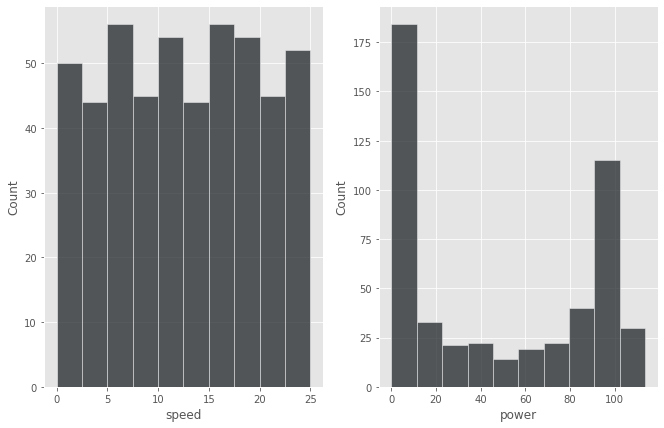

In [8]:

# cheks how the distribution looks like for speed and power column.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", ax=ax[0]);
sns.histplot(data=df, x="power", ax=ax[1]);
# worth noting that there is a high volume of variables in a first section (0-10) of power output 


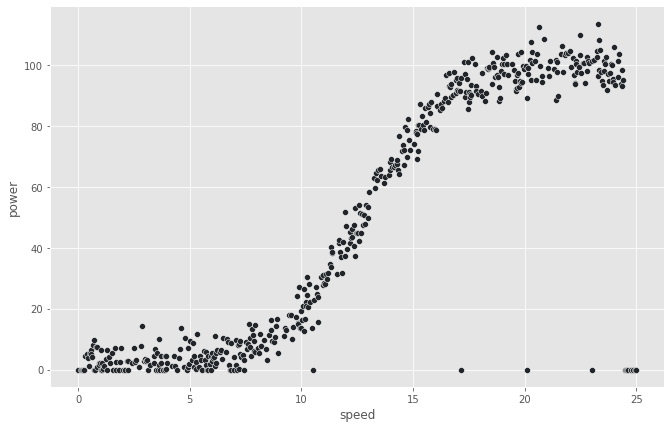

In [9]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power');

#### — *Assumption*

Taking into consideration the output from data preview and what can be observed at the scatter plot some assumption has to be made. Power turbine has to generate some power output above certain level apart from wind direction and air density which are not included in dataset so will not be taken into the consideration. Based on given dataset that includes wind speed and power output generated by power turbine, five seems to be a sweet spot. 


In [10]:
# let's remove the outliers according to assumption made above 
# finding on how to remove rows based on a conditional expression
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
df = df.drop(df[(df.speed > 5) & (df.power == 0)].index).reset_index(drop=True)
df.T


,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


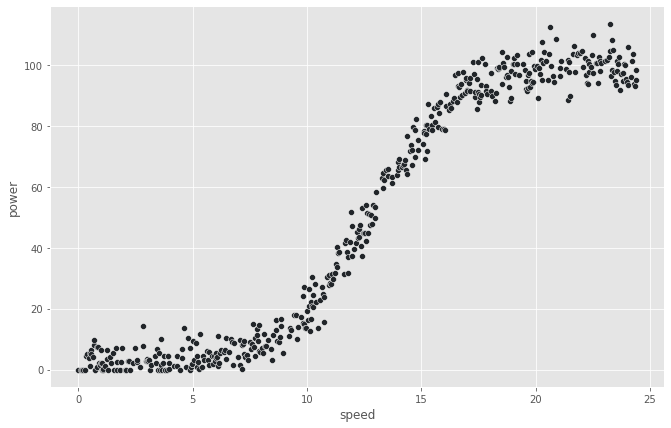

In [11]:
# plot of newly created dataset 
sns.scatterplot(data=df, x='speed', y='power' );

#### — *Linear Regretion*

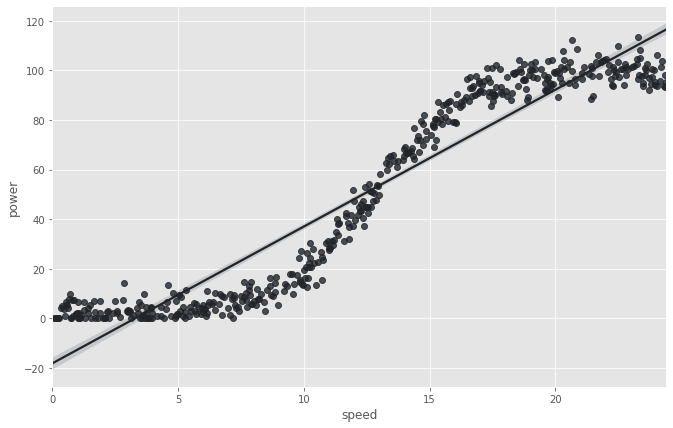

In [12]:
sns.regplot(data=df, x='speed', y='power');

### Train

In [8]:
x = df['speed'].to_numpy()
y = df['power'].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x,y)
r = model.score(x,y)
p = [model.intercept_, model.coef_[0]]


In [9]:
r

0.7289360258564073

In [10]:
p

[-13.899902630519634, 4.9175956654046695]

In [11]:
def f(v, p):
    return p[0] + v * p[1]

In [12]:
f(10, p)

35.27605402352706

### References

[1] 